In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib
import pickle
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA

sns.set(font_scale=1, context='notebook')
matplotlib.rcParams['figure.figsize'] = 10,10
plt.rcParams['axes.facecolor'] = '#f5f5f5'

# Load data
<br>

In [2]:
# Load gate vector data
with open('output/' + 'test' + '.pkl', 'rb') as f:
        input = pickle.load(f)

In [3]:
# Get components from data
gates = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

In [4]:
print(parameter_dict)
print(labels)
print(gates.shape)

{'L': 5, 'tensor_size': 30, 'learning_rate': 0.001, 'num_batches': 1001, 'M': 3, 'batch_size': 1000, 'output_file': 'test', 'gamma': 2}
[6 1 8 ..., 0 4 2]
(2500, 5, 3)


# Define Functions

In [5]:
def visualize_gates(gates, images, num_test_digits=10, shuffle=True):
    '''
    Visualize num_test_digits examples of gate activations
    '''
    # Indiviual cell is height=1, width=0.4
    width = 1 * gates.shape[2] # Cell width * num of modules
    height = 0.4 * gates.shape[1] # Cell height * num of layers
    figsize = (width, height) 

    plot_num = num_test_digits * 100 + 11
    for i in range(num_test_digits):
        # To shuffle
        if shuffle:
            k = (i + np.random.randint(low=0, high=gates.shape[0]-1)) % gates.shape[0]
        else:
            k = i

        plt.figure(figsize=(5, 2))
        plt.title('Number is: '+str(labels[k]))
        sns.heatmap(gates[k,:,:])
        plt.figure(figsize=(2, 2))
        plt.imshow(images[k])


def compute_cosine_sim(gates, parameter_dict, num_test_digits, trial = 2):
    '''
    Compute cosine similarity
    '''
    gate_vectors = np.reshape(gates, (-1, parameter_dict['L']*parameter_dict['M']))
    #print(gate_vectors.shape)
    gate_vectors = np.transpose(gate_vectors)

    output = np.zeros(num_test_digits)
    for i in range(num_test_digits):
        a = gate_vectors[:, trial]
        b = gate_vectors[:, i]
        an = a/np.linalg.norm(a)
        bn = b/np.linalg.norm(b)
        output[i] = np.dot(an,bn)

    print('output', output)
    elems = np.argsort(output)
    print('Most similar elems to trial', elems[::-1])
    
    
def visualize_model(gates_reshaped, labels, model):
    '''
    Visualize the data X, with label y with the model (t-SNE or PCA)
    '''
    print(gates_reshaped.shape) # sanity check
    independent_labels = list(set(labels))
    print(independent_labels) # sanity check

    x = model.fit_transform(gates_reshaped)
    y = labels

    # Add more colors if doing something other than MNIST
    colors = ['b','g','#00FFFF','c','m','y','k','#00A4BA','r','#F4C2C2']

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    for i in (independent_labels):
        mask_i = y == i
        x_i = x[mask_i]
        ax1.scatter(x_i[:,0], x_i[:,1], s=10, c=colors[i], label='Label: '+str(i))
    plt.legend(loc='upper left');
    plt.show()


def visualize_comparison(gates_reshaped, labels, model, digits=[7,8]):
    '''
    Same as visualize model but only plots certain digits 
    '''
    mask = labels == digits[0]
    for digit in digits:
        mask_digit = labels == digit
        mask = mask | mask_digit

    gates_reshaped_masked = gates_reshaped[mask, :]
    labels_masked = labels[mask]
    
    x = model.fit_transform(gates_reshaped_masked)
    y = labels_masked

    # Add more colors if doing something other than MNIST
    colors = ['b','g','#00FFFF','c','m','y','k','#00A4BA','r','#F4C2C2']

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    for i in (digits):
        mask_i = y == i
        x_i = x[mask_i]
        ax1.scatter(x_i[:,0], x_i[:,1], s=10, c=colors[i], label='Label: '+str(i))
    plt.legend(loc='upper left');
    plt.show()

# Visualize gates and images
<br>

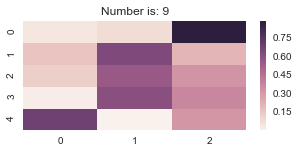

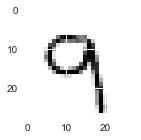

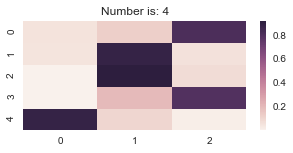

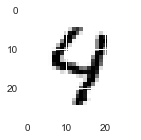

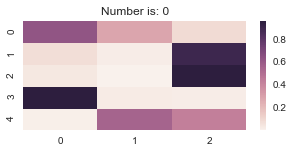

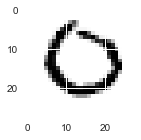

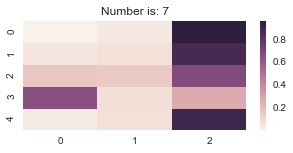

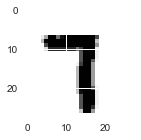

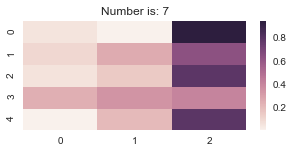

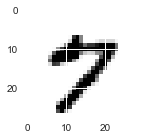

In [6]:
visualize_gates(gates, images, num_test_digits=5)

In [7]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

In [8]:
compute_cosine_sim(gates, parameter_dict, num_test_digits=5, trial=2)

output [ 0.5334778   0.26406811  1.          0.25902701  0.59219041]
Most similar elems to trial [2 4 0 1 3]


# Visualizations of the gates (dim reduction)


In [9]:
# Preprocess to make gates the correct size
gates_reshaped = np.reshape(gates, [gates.shape[0], -1])

## Plot PCA

(2500, 15)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


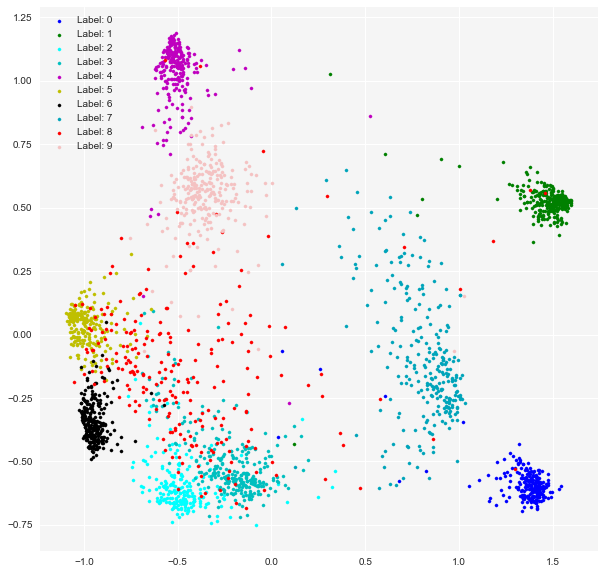

In [10]:
# Visualize PCA
visualize_model(gates_reshaped, labels, PCA())

## Plot t-SNE

(2500, 15)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 0.086058
[t-SNE] Iteration 25: error = 1.8787298, gradient norm = 0.0068804
[t-SNE] Iteration 50: error = 1.6849338, gradient norm = 0.0050609
[t-SNE] Iteration 75: error = 1.1696578, gradient norm = 0.0019774
[t-SNE] Iteration 100: error = 1.0947334, gradient norm = 0.0016330
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.094733
[t-SNE] Iteration 125: error = 0.9844885, gradient norm = 0.0012282
[t-SNE] Iteration 150: error = 0.9531245, gradient norm = 0.0011186
[t-SNE] Iteration 175: error = 0.9456256, gradient norm = 0.0010939
[t-SNE] Iteration 200: error = 0.9435802, gradient norm = 0.0010879
[t-SNE] Iteration 225: error = 

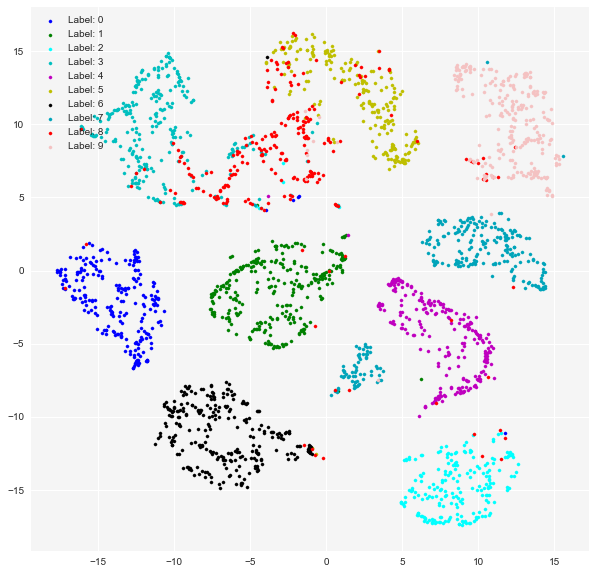

In [11]:
# Visualize t-SNE
visualize_model(gates_reshaped, labels, TSNE(verbose=100))

## Plot digit comparisons (PCA)

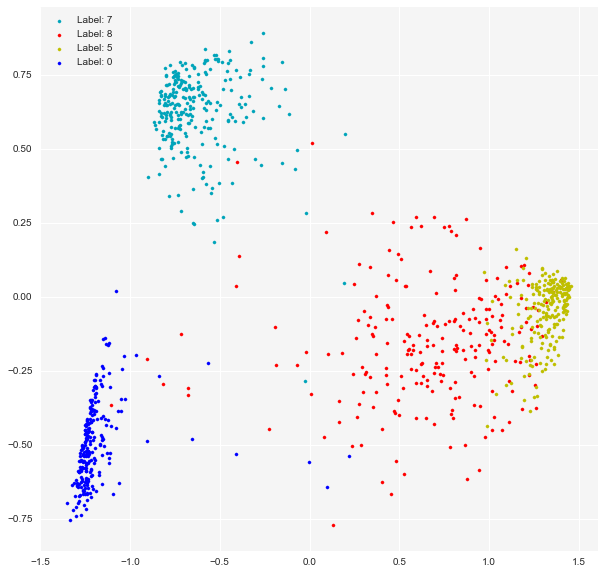

In [12]:
# Visualize the comparison between a and b (with PCA)
visualize_comparison(gates_reshaped, labels, PCA(), digits=[7,8,5,0])

## Plot digit comparisons (t-SNE)


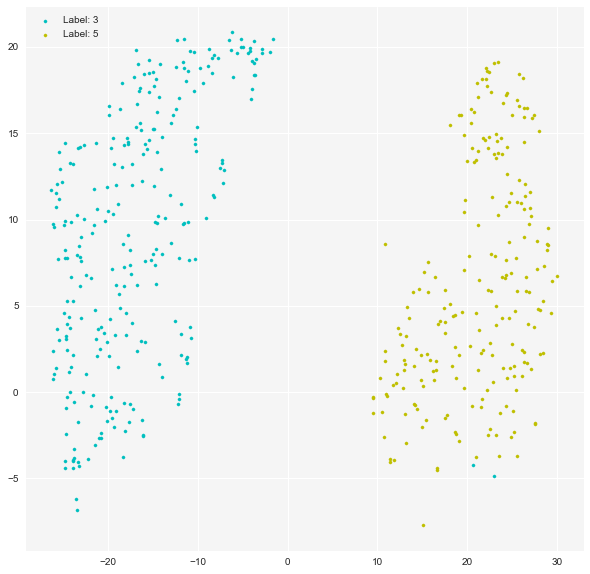

In [13]:
# Visualize the comparison between a and b (with t-SNE)
visualize_comparison(gates_reshaped, labels, TSNE(), digits=[3,5])

# For Softmax outputs of digits

## Visualize Softmax Predictions

In [14]:
# Load gate vector data
with open('output/' 'softmax_outputs' + '.pkl', 'rb') as f:
        input = pickle.load(f)

In [15]:
# Get components from data
preds = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

In [16]:
print(parameter_dict)
print(labels.shape)
print(preds.shape)

{'L': 5, 'tensor_size': 30, 'learning_rate': 0.001, 'num_batches': 1001, 'M': 3, 'batch_size': 1000, 'output_file': 'softmax_outputs', 'gamma': 2}
(2500,)
(2500, 1, 10)


## Visualize predictions and images
<br>

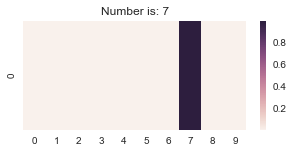

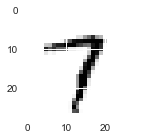

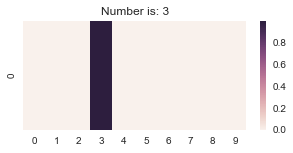

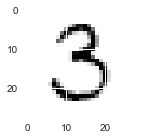

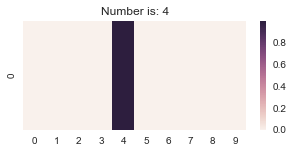

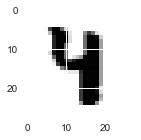

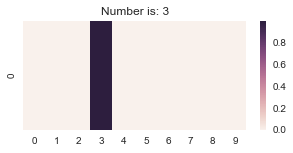

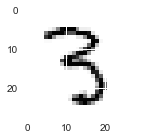

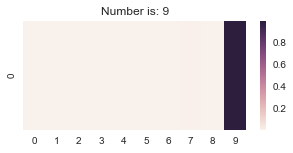

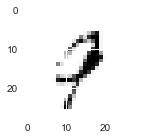

In [17]:
visualize_gates(preds, images, num_test_digits=5)

In [18]:
preds_reshaped = np.reshape(preds, [preds.shape[0], -1])

## Plot PCA

(2500, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


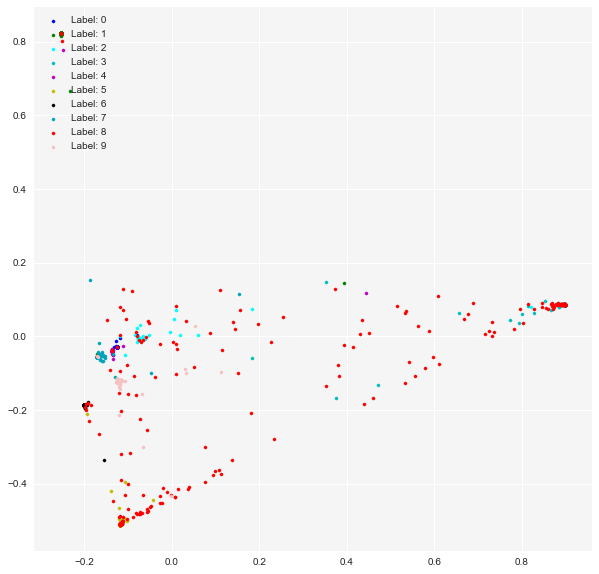

In [19]:
visualize_model(preds_reshaped, labels, PCA())

## Plot t-SNE

(2500, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 0.000001
[t-SNE] Iteration 25: error = 1.8115977, gradient norm = 0.0070296
[t-SNE] Iteration 50: error = 1.5975194, gradient norm = 0.0055702
[t-SNE] Iteration 75: error = 0.9796023, gradient norm = 0.0030199
[t-SNE] Iteration 100: error = 0.8827529, gradient norm = 0.0025340
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.882753
[t-SNE] Iteration 125: error = 0.7442945, gradient norm = 0.0020076
[t-SNE] Iteration 150: error = 0.7067327, gradient norm = 0.0019142
[t-SNE] Iteration 175: error = 0.6996168, gradient norm = 0.0019322
[t-SNE] Iteration 200: error = 0.6979052, gradient norm = 0.0019569
[t-SNE] Iteration 225: error = 

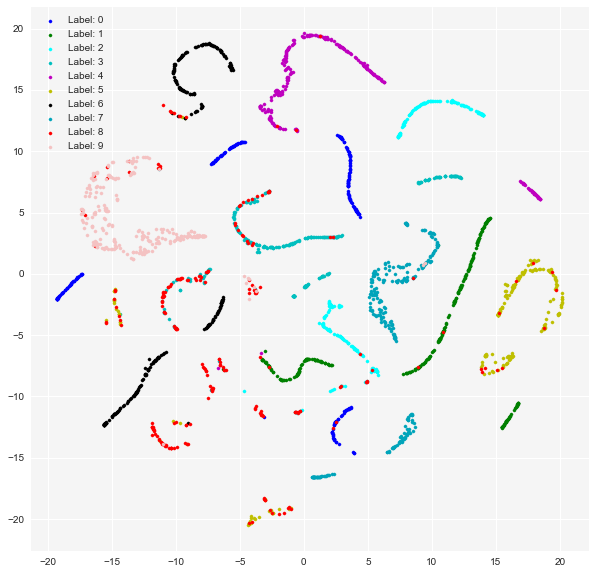

In [20]:
visualize_model(preds_reshaped, labels, TSNE(verbose=100))

## Plot digit comparisons (PCA)

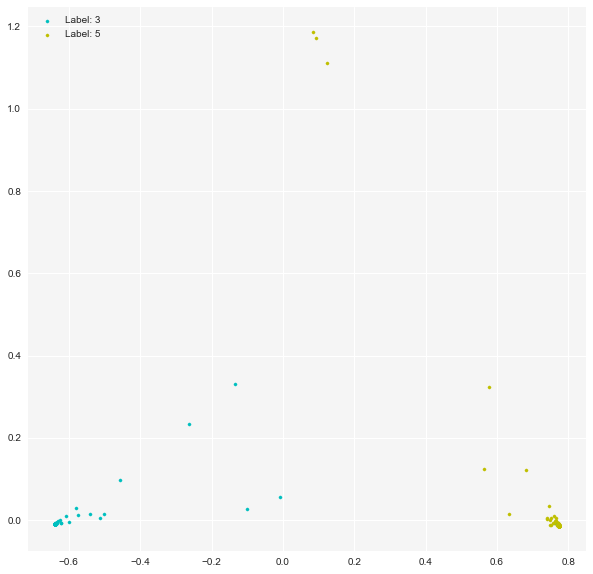

In [21]:
# Visualize the comparison between a and b (with PCA)
visualize_comparison(preds_reshaped, labels, PCA(), digits=[3,5])

## Plot digit comparisons (t-SNE)

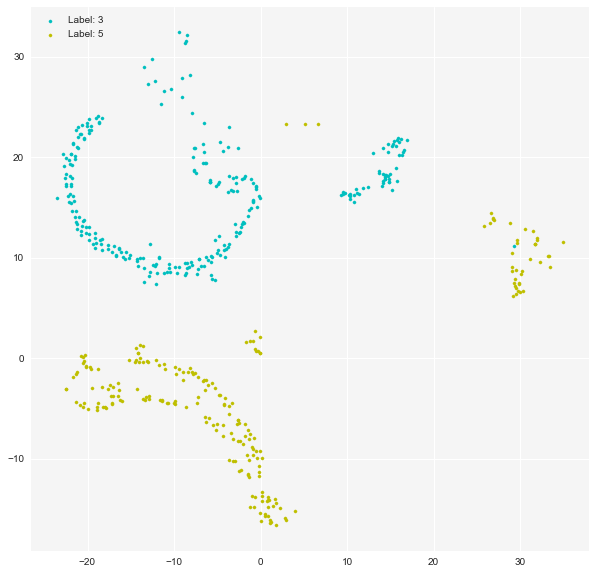

In [22]:
# Visualize the comparison between a and b (with t-SNE)
visualize_comparison(preds_reshaped, labels, TSNE(), digits=[3,5])